<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Cluster_1_Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [131]:
data_df = pd.read_csv('cluster_1.csv')
#data_df = pd.read_csv('Crop_recommendation.csv', index_col='label')
data_df.head()

,temperature,humidity,label,cluster
0,21,83,padi,1
1,22,81,padi,1
2,24,83,padi,1
3,27,81,padi,1
4,21,82,padi,1


In [132]:
data_df.describe()

,temperature,humidity,cluster
count,1208.000000,1208.000000,1208.0
mean,26.110927,87.832781,1.0
std,3.975811,5.779160,0.0
min,14.000000,74.000000,1.0
25%,24.000000,83.000000,1.0
50%,26.000000,89.000000,1.0
75%,29.000000,93.000000,1.0
max,38.000000,100.000000,1.0


In [133]:
data_df.shape

(1208, 4)

In [134]:
data_df.dtypes

temperature     int64
humidity        int64
label          object
cluster         int64
dtype: object

In [135]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
cluster        0
dtype: int64

In [136]:
data_df[data_df.duplicated()]

,temperature,humidity,label,cluster
7,21,83,padi,1
9,24,84,padi,1
12,27,81,padi,1
18,22,81,padi,1
19,24,84,padi,1
...,...,...,...,...
1203,24,94,pepaya,1
1204,26,94,pepaya,1
1205,24,94,pepaya,1
1206,32,91,pepaya,1


In [137]:
data_df.describe()

,temperature,humidity,cluster
count,1208.000000,1208.000000,1208.0
mean,26.110927,87.832781,1.0
std,3.975811,5.779160,0.0
min,14.000000,74.000000,1.0
25%,24.000000,83.000000,1.0
50%,26.000000,89.000000,1.0
75%,29.000000,93.000000,1.0
max,38.000000,100.000000,1.0


In [138]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  1208 non-null   int64 
 1   humidity     1208 non-null   int64 
 2   label        1208 non-null   object
 3   cluster      1208 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 37.9+ KB


In [139]:
data_df['label'].value_counts()

padi            100
kacang hijau    100
delima          100
pisang          100
anggur          100
semangka        100
melon           100
apel            100
jeruk           100
pepaya          100
kelapa          100
kapas           100
jagung            8
Name: label, dtype: int64

# Identifikasi Nilai Outlier

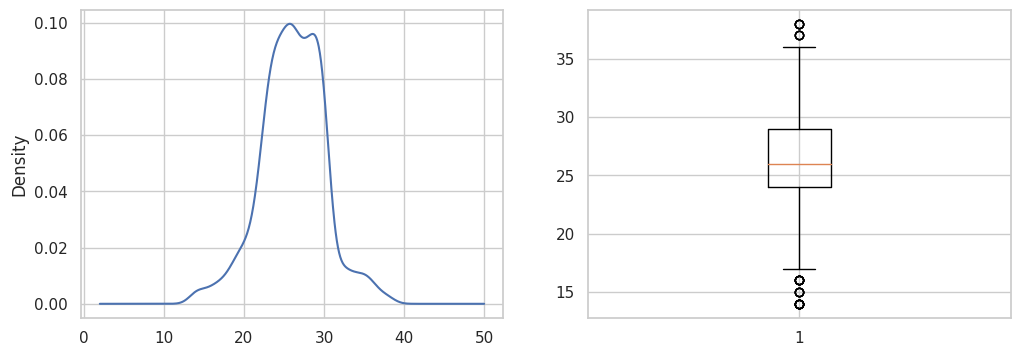

In [140]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

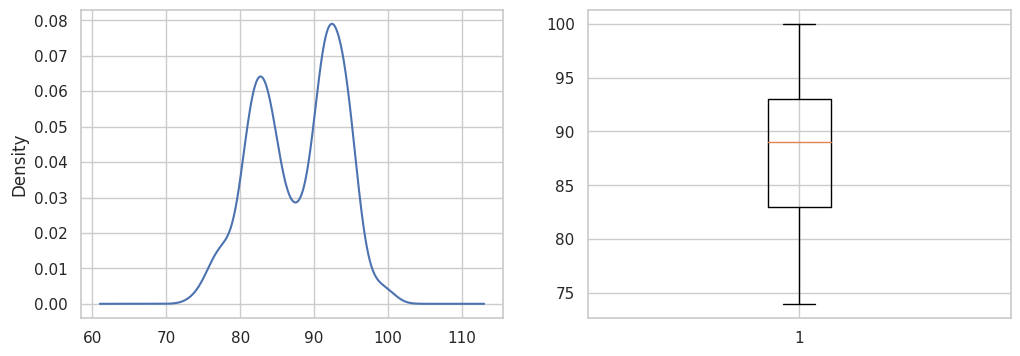

In [141]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

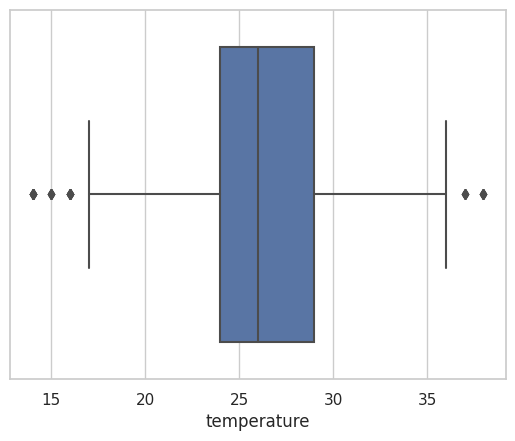

In [142]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

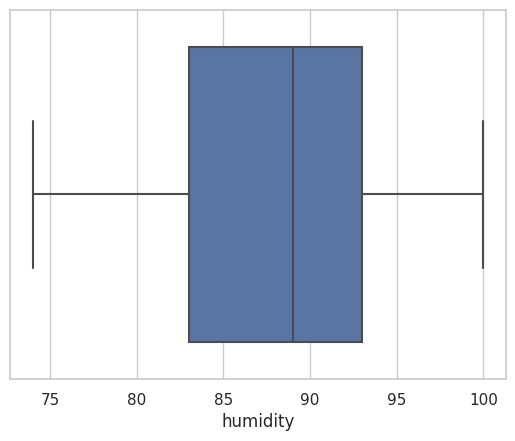

In [143]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [144]:
# data_df = data_df.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis = 1)
data_df.head()

,temperature,humidity,label,cluster
0,21,83,padi,1
1,22,81,padi,1
2,24,83,padi,1
3,27,81,padi,1
4,21,82,padi,1


In [145]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 24.0

Q3:
 29.0

IQR:
 5.0

Min:
 16.5

Max:
 36.5


In [146]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(1177, 4)

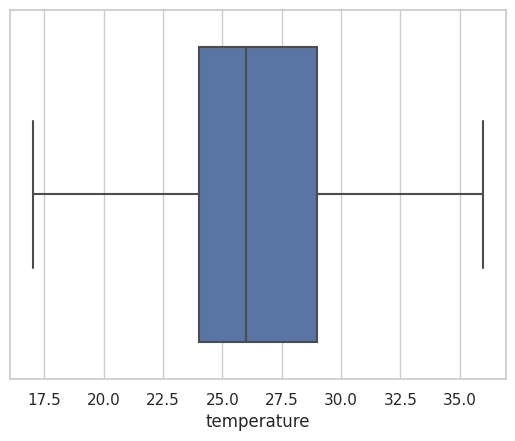

In [147]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [148]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
cluster        0
dtype: int64

In [149]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [150]:
df_clean.value_counts()

temperature  humidity  label     cluster
30           91        melon     1          13
23           93        apel      1          11
             91        apel      1          11
30           95        melon     1          11
23           95        apel      1          10
                                            ..
21           94        jeruk     1           1
             93        delima    1           1
27           83        anggur    1           1
                       semangka  1           1
36           94        pepaya    1           1
Length: 448, dtype: int64

In [151]:
df_clean.tail()

,temperature,humidity,label,cluster
1202,24,93,pepaya,1
1203,24,94,pepaya,1
1204,26,94,pepaya,1
1205,24,94,pepaya,1
1206,32,91,pepaya,1


In [152]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 20
humidity , Unique : 27
label , Unique : 13
cluster , Unique : 1


# Visualisasi data

<ipython-input-153-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

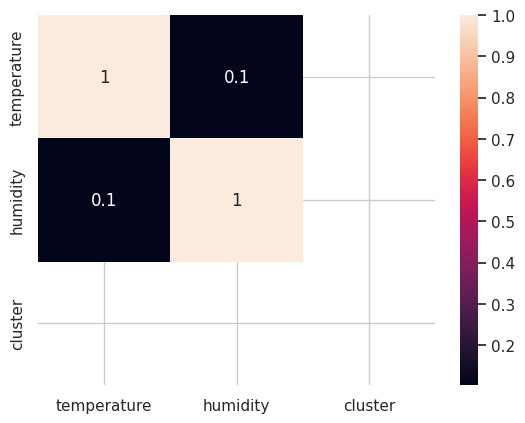

In [153]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [154]:
df_clean.corr()

<ipython-input-154-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity,cluster
temperature,1.000000,0.103297,NaN
humidity,0.103297,1.000000,NaN
cluster,NaN,NaN,NaN


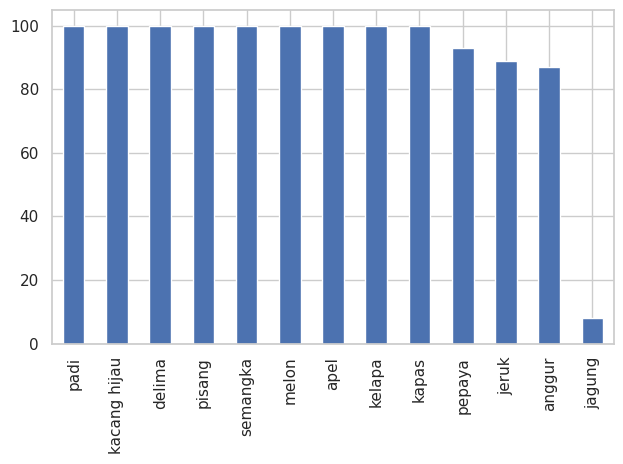

In [155]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

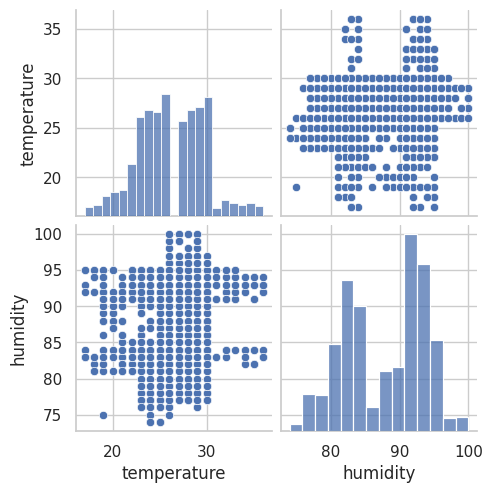

In [156]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [157]:
# X = data_df[data_df.columns[:-1]].values
# y = data_df[data_df.columns[-1]].values

# X.shape

# **Data Sintetik**

In [158]:
# pip install imbalanced-learn scikit-learn

In [159]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

#Hapus data yang memiliki presisi dibawah 0.5
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'kapas'].index)
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'padi'].index)
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'pepaya'].index)
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'pisang'].index)
print(df_clean['label'])

# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# data_res = pd.DataFrame({
#     'temperature': X_res[:, 0],
#     'humidity': X_res[:, 1],
#     'label': y_res
# })

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
padi            100
kacang hijau    100
delima          100
pisang          100
semangka        100
melon           100
apel            100
kelapa          100
kapas           100
pepaya           93
jeruk            89
anggur           87
jagung            8
Name: label, dtype: int64
100     jagung
101     jagung
102     jagung
103     jagung
104     jagung
         ...  
1170     jeruk
1171     jeruk
1172     jeruk
1173     jeruk
1174     jeruk
Name: label, Length: 784, dtype: object

Jumlah sampel setelah SMOTE:
jagung          100
kacang hijau    100
delima          100
anggur          100
semangka        100
melon           100
apel            100
jeruk           100
kelapa          100
Name: label, dtype: int64


# **Klasifikasi model**

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

In [161]:
# X = df_clean[['temperature', 'humidity']] #input features ke dalam x
# X.head()

In [162]:
# y = df_clean['label'] #label masuk ke variabel y
# y.head()
# Menghapus data dengan label 'kapas'


# **Split dataset ke training set dan testing set**

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(720, 2)
(720,)

testing dataset:
(180, 2)
(180,)


# **Decission tree**

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# Decission tree

In [175]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [176]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.8166666666666667


**Classification report**

In [177]:
print(classification_report(y_test,predicted_values)) #classification report

              precision    recall  f1-score   support

      anggur       1.00      0.73      0.84        22
        apel       0.62      1.00      0.77        15
      delima       0.84      0.70      0.76        23
      jagung       1.00      1.00      1.00        17
       jeruk       0.75      0.43      0.55        28
kacang hijau       0.89      1.00      0.94        16
      kelapa       0.69      0.73      0.71        15
       melon       0.75      1.00      0.86        18
    semangka       0.87      1.00      0.93        26

    accuracy                           0.82       180
   macro avg       0.82      0.84      0.82       180
weighted avg       0.83      0.82      0.81       180



**Confusion matrix**

In [178]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[16  0  0  0  0  2  0  0  4]
 [ 0 15  0  0  0  0  0  0  0]
 [ 0  3 16  0  4  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0]
 [ 0  6  3  0 12  0  5  2  0]
 [ 0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0 11  4  0]
 [ 0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0 26]]


In [179]:
from sklearn.model_selection import cross_val_score


In [180]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.80254777, 0.8089172 , 0.79617834, 0.8089172 , 0.79487179])

# KNN

In [181]:
accuracies = []
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 2)) 

k =  1  => Akurasi =  0.76
k =  2  => Akurasi =  0.77
k =  3  => Akurasi =  0.79
k =  4  => Akurasi =  0.79
k =  5  => Akurasi =  0.78
k =  6  => Akurasi =  0.78
k =  7  => Akurasi =  0.78
k =  8  => Akurasi =  0.75
k =  9  => Akurasi =  0.76
k =  10  => Akurasi =  0.77
k =  11  => Akurasi =  0.76
k =  12  => Akurasi =  0.78
k =  13  => Akurasi =  0.79
k =  14  => Akurasi =  0.8
k =  15  => Akurasi =  0.79
k =  16  => Akurasi =  0.79
k =  17  => Akurasi =  0.78
k =  18  => Akurasi =  0.75
k =  19  => Akurasi =  0.76
k =  20  => Akurasi =  0.77
k =  21  => Akurasi =  0.78
k =  22  => Akurasi =  0.76
k =  23  => Akurasi =  0.76
k =  24  => Akurasi =  0.75


In [182]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.7777777777777778
              precision    recall  f1-score   support

      anggur       0.82      0.82      0.82        22
        apel       0.60      1.00      0.75        15
      delima       0.86      0.52      0.65        23
      jagung       1.00      1.00      1.00        17
       jeruk       0.64      0.50      0.56        28
kacang hijau       0.94      0.94      0.94        16
      kelapa       0.67      0.67      0.67        15
       melon       0.70      0.89      0.78        18
    semangka       0.88      0.88      0.88        26

    accuracy                           0.78       180
   macro avg       0.79      0.80      0.78       180
weighted avg       0.79      0.78      0.77       180



# Naive bayes

In [183]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.7944444444444444
              precision    recall  f1-score   support

      anggur       0.87      0.91      0.89        22
        apel       0.61      0.93      0.74        15
      delima       0.80      0.70      0.74        23
      jagung       1.00      1.00      1.00        17
       jeruk       0.69      0.39      0.50        28
kacang hijau       0.94      0.94      0.94        16
      kelapa       0.73      0.73      0.73        15
       melon       0.67      0.89      0.76        18
    semangka       0.88      0.88      0.88        26

    accuracy                           0.79       180
   macro avg       0.80      0.82      0.80       180
weighted avg       0.80      0.79      0.79       180



# Random forest

In [184]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.7888888888888889
              precision    recall  f1-score   support

      anggur       0.78      0.82      0.80        22
        apel       0.65      1.00      0.79        15
      delima       0.88      0.65      0.75        23
      jagung       1.00      1.00      1.00        17
       jeruk       0.67      0.50      0.57        28
kacang hijau       1.00      0.94      0.97        16
      kelapa       0.59      0.67      0.62        15
       melon       0.76      0.89      0.82        18
    semangka       0.85      0.85      0.85        26

    accuracy                           0.79       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.80      0.79      0.79       180

